# Importing Classical Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
import pylatexenc

# Importing Quantum Computing Libraries

In [2]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


In [3]:
import pandas as pd

## Loading Dataset using pandas library

In [4]:
df=pd.read_csv('african_crises.csv')

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.


In [5]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


# Scaling The Dataset

In [6]:
# Create a Standard Scalar object
scalar = StandardScaler()

# Apply scaling to numerical columns
df[['exch_usd', 'inflation_annual_cpi']] = scalar.fit_transform(df[['exch_usd', 'inflation_annual_cpi']])

# Display the updated DataFrame
df.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,-0.386713,0,0,0.0,-0.030863,0,0,0,0
1,1,3,0,1871,0,-0.386708,0,0,0.0,-0.030848,0,0,0,1
2,1,3,0,1872,0,-0.386712,0,0,0.0,-0.030874,0,0,0,1
3,1,3,0,1873,0,-0.386718,0,0,0.0,-0.030852,0,0,0,1
4,1,3,0,1874,0,-0.386721,0,0,0.0,-0.030874,0,0,0,1


# Splitting dataset into test and train groups

In [7]:
X=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [8]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.8943396226415095
Model: RandomForestClassifier, Score: 0.9773584905660377


# Plotting The Confusion Matrix

In [9]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  F1 Score: {f1:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print("-" * 20)



Model: SVC
  Accuracy: 0.8943
  F1 Score: 0.9442
  Precision: 0.8943
  Recall: 1.0000
--------------------
Model: RandomForestClassifier
  Accuracy: 0.9774
  F1 Score: 0.9874
  Precision: 0.9793
  Recall: 0.9958
--------------------


# Analyzing Classical Results

## Model Comparison

| **Model** | **Accuracy** | **F1 Score** | **Precision** | **Recall** |
| --- | --- | --- | --- | --- |
| Support Vector Classifier (SVC) | 0.8943 | 0.9442 | 0.8943 | 1.0000 |
| Random Forest Classifier (RFC) | 0.9736 | 0.9854 | 0.9752 | 0.9958 |


# Data Preparation For Quantum Processing

In [10]:
dfq=df.copy()

# Feature Reduction

# 1. Correlation Method

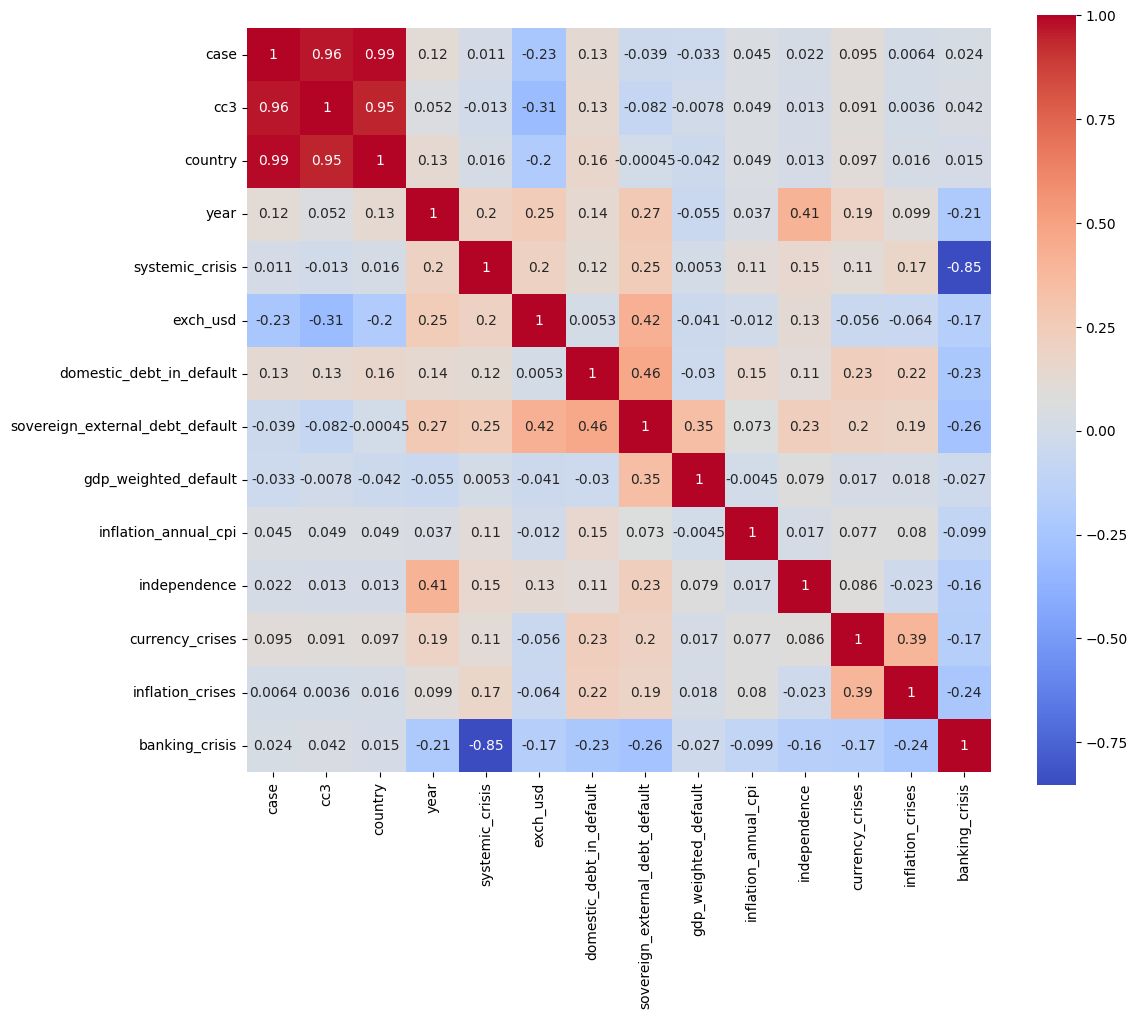

In [11]:
corr_matrix = dfq.corr()
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

# Calculate correlation with target


In [12]:
# Calculate correlation matrix
correlation_matrix = dfq.corr()

# Get correlations with target variable 'banking_crisis'
target_correlations = correlation_matrix['banking_crisis'].abs()

# Filter columns with correlation < 0.5
columns_to_drop = target_correlations[target_correlations < 0.2].index
columns_to_drop = columns_to_drop[columns_to_drop != 'banking_crisis']  # exclude target variable

# Drop columns
dfq_filtered_corr = dfq.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print(f"Remaining columns: {dfq_filtered_corr.columns}")

print(f"Number of remaining columns: {len(dfq_filtered_corr.columns)}")

Dropped columns: ['case', 'cc3', 'country', 'exch_usd', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises']
Remaining columns: Index(['year', 'systemic_crisis', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'inflation_crises',
       'banking_crisis'],
      dtype='object')
Number of remaining columns: 6


In [13]:
dfq_filtered_corr

,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,inflation_crises,banking_crisis
0,1870,1,0,0,0,0
1,1871,0,0,0,0,1
2,1872,0,0,0,0,1
3,1873,0,0,0,0,1
4,1874,0,0,0,0,1
...,...,...,...,...,...,...
1054,2009,1,1,1,0,0
1055,2010,0,1,1,0,1
1056,2011,0,1,1,0,1
1057,2012,0,1,1,0,1


# 2.**Principal Component Analysis (PCA)**: 
### Select top k principal components explaining most of the variance.


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # retain 95% of variance
dfq_filtered_pca = pca.fit_transform(dfq.drop(['banking_crisis'], axis=1))

In [15]:
dfq_filtered_pca

array([[-102.27841355,  -18.41620694,    1.01305105],
       [-101.29399201,  -18.58228248,    1.05353039],
       [-100.30802895,  -18.74875589,    1.06432099],
       ...,
       [  48.54020328,   27.66462765,   -1.47455007],
       [  49.5261664 ,   27.49815422,   -1.46375981],
       [  50.51212951,   27.33168079,   -1.4529697 ]])

In [16]:
dfq_filtered_pca.size

3177

In [17]:
# Convert array to DataFrame
dfq_filtered_pca = pd.DataFrame(dfq_filtered_pca)

In [18]:
# Add 'banking_crisis' column
dfq_filtered_pca['banking_crisis'] = dfq['banking_crisis']


# Reducing Samples

# Sample Reduction of Correlation Based Data Set

In [19]:
from sklearn.utils import resample

# Define sample size
sample_size = 100

# Stratified sampling (maintaining class balance)
dfq_sampled_corr = pd.concat([resample(dfq_filtered_corr[dfq_filtered_corr['banking_crisis'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_corr[dfq_filtered_corr['banking_crisis'] == c]) / len(dfq_filtered_corr))) for c in dfq_filtered_corr['banking_crisis'].unique()])

In [20]:
dfq_sampled_corr

,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,inflation_crises,banking_crisis
140,1993,0,1,1,1,0
1050,2005,1,1,1,1,0
485,1995,1,0,1,0,0
702,2009,1,0,0,0,0
1052,2007,1,1,1,1,0
...,...,...,...,...,...,...
1037,1992,0,0,0,1,1
41,1971,0,0,0,0,1
54,1984,0,0,0,0,1
555,1997,0,0,0,0,1


# Sample Reduction of PCA Based Data Set

In [21]:

# Define sample size
sample_size = 100

# Stratified sampling (maintaining class balance)
dfq_sampled_pca = pd.concat([resample(dfq_filtered_pca[dfq_filtered_pca['banking_crisis'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_pca[dfq_filtered_pca['banking_crisis'] == c]) / len(dfq_filtered_pca))) for c in dfq_filtered_pca['banking_crisis'].unique()])

In [22]:
dfq_sampled_pca

,0,1,2,banking_crisis
485,26.707602,-5.439079,-0.472844,0
686,26.506840,5.425233,0.441208,0
0,-102.278414,-18.416207,1.013051,0
198,20.509384,-30.252073,-2.042145,0
951,34.505217,28.772457,0.206843,0
...,...,...,...,...
106,-31.153780,-29.729544,-0.521664,1
189,11.644786,-28.773644,-3.227460,1
125,-12.420481,-32.892539,-0.316648,1
171,-6.118662,-25.750179,-1.914400,1


# Splitting of Data Sets into Test and Train Samples

In [23]:
# Training and Testing for Corr Based Data
X=dfq_sampled_corr.drop('banking_crisis',axis=1)
y=dfq_sampled_corr['banking_crisis']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.20, random_state=40)

# Training and Testing of PCA based Data
X_pca=dfq_sampled_pca.drop('banking_crisis',axis=1)
y_pca=dfq_sampled_pca['banking_crisis']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y_pca, test_size=0.20, random_state=40)

# Feature Maps

# Featue Map For Corr Based Data

In [24]:
feature_dim = X_train_c.shape[1]

feature_map_c = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

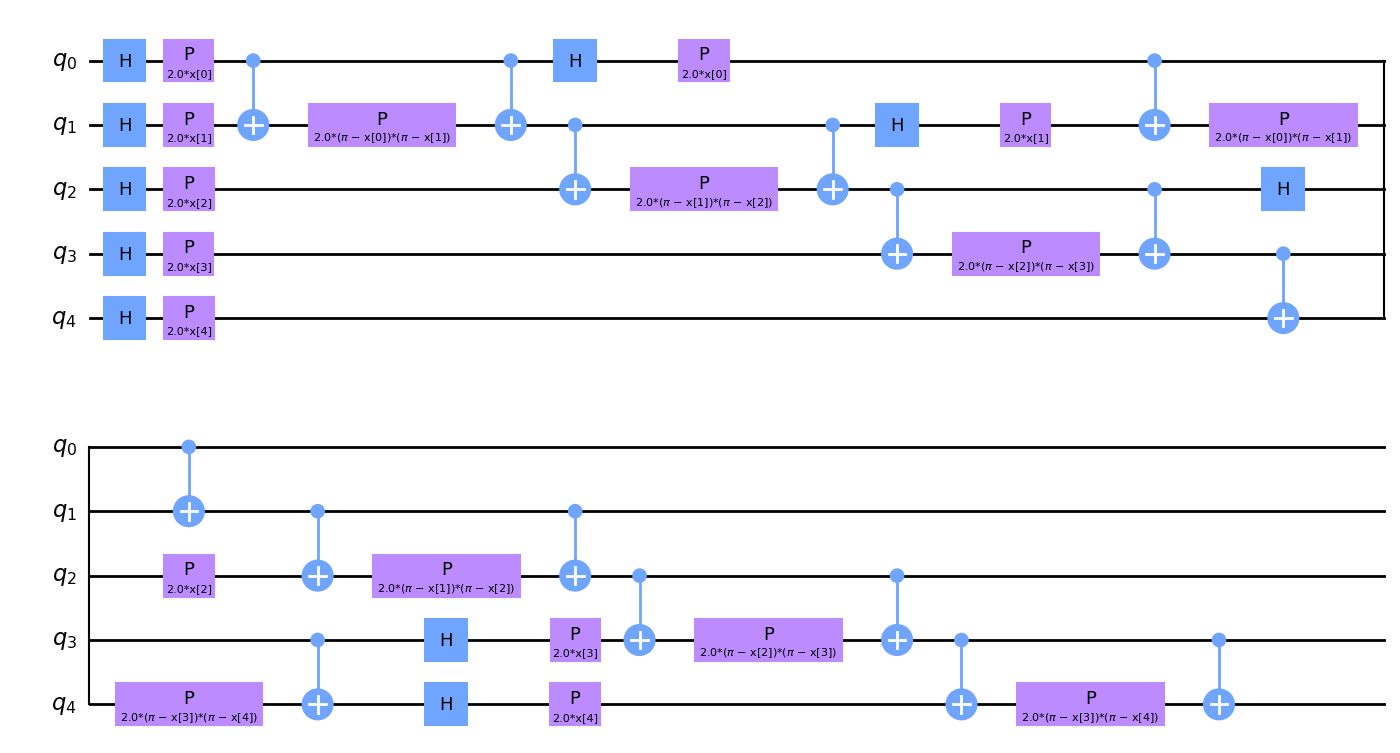

In [25]:
feature_map_c.decompose().draw(output="mpl", style="clifford", fold=20)

# Featue Map For PCA Based Data

In [26]:
feature_dim = X_train_p.shape[1]

feature_map_p = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

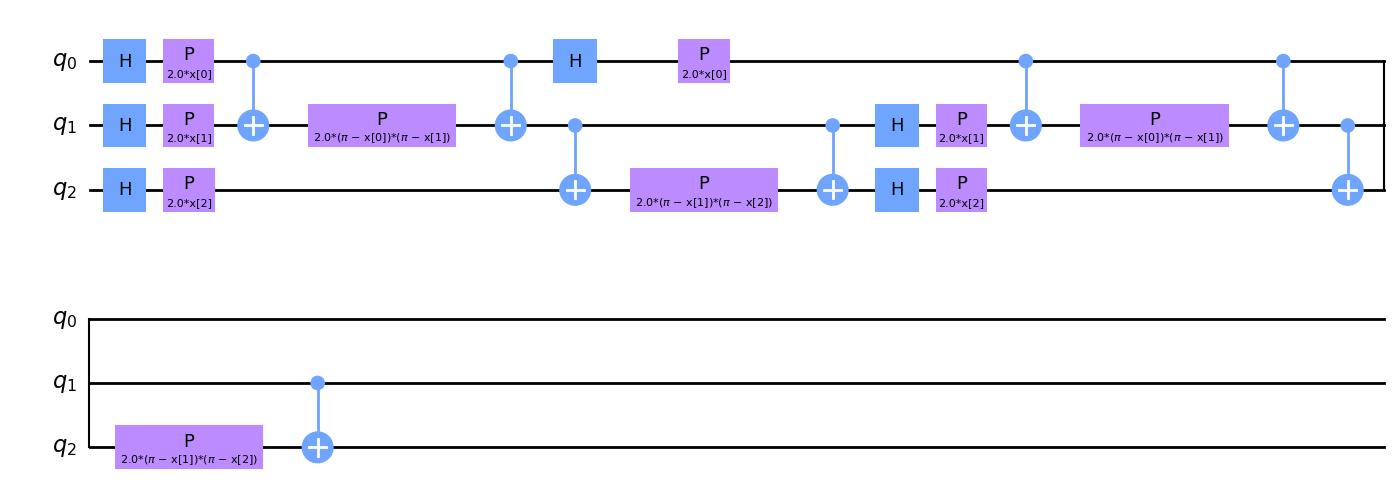

In [27]:
feature_map_p.decompose().draw(output="mpl", style="clifford", fold=20)

# Setting Up Quantum Kernel

In [28]:
from qiskit.primitives import Sampler
sampler=Sampler()

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_4848\2810157668.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler=Sampler()


# Quantum Kernel (Correlation Based Data)

In [29]:
fidelity = ComputeUncompute(sampler=sampler)
q_kernel_corr = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_c)

# Quantum Kernel (PCA Based Data)

In [30]:
q_kernel_pca = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_p)

# QSVC on Corr Based and PCA Based Kernel

In [31]:
import time
qsvc = QSVC(
    quantum_kernel=q_kernel_corr
)
start = time.time()
qsvc.fit(X_train_c, y_train_c)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(X_test_c, y_test_c)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 30 seconds
QSVC classification test score: 0.95


In [32]:
import time
qsvc_PCA = QSVC(
    quantum_kernel=q_kernel_pca
)
start = time.time()
qsvc_PCA.fit(X_train_p, y_train_p)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc_PCA.score(X_test_p, y_test_p)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 21 seconds
QSVC classification test score: 0.95


In [33]:
# Evaluate training matrix
matrix_train = q_kernel_pca.evaluate(X_train_p)

# Evaluate testing matrix
matrix_test = q_kernel_pca.evaluate(X_test_p, X_train_p)

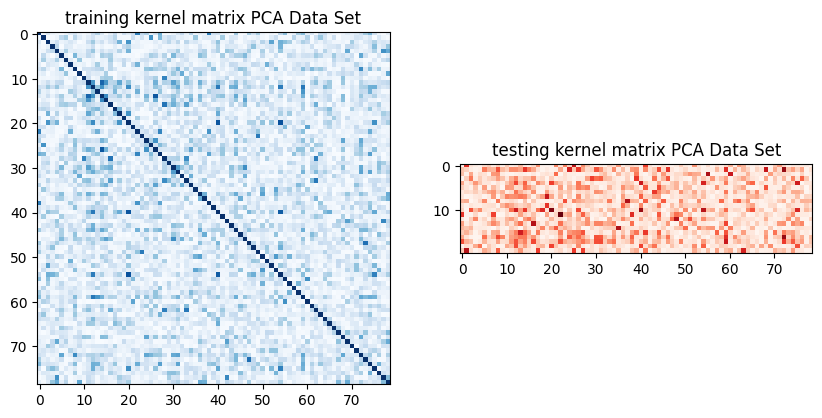

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("training kernel matrix PCA Data Set")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("testing kernel matrix PCA Data Set")

plt.show()